In [5]:
from create_model import load_and_process_X, DataSet, Statistics, load_and_process_y, Metrics

random_state = 41

In [ ]:
df_X = load_and_process_X(DataSet.EURO26, 100, [Statistics.SUM])
df_y = load_and_process_y(DataSet.EURO26, 100)

In [ ]:
df_X

In [ ]:
df_y

In [ ]:
from create_model import evaluate_models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

random_state = 41

base_models = [
    KNeighborsRegressor(n_neighbors=3),
    KNeighborsRegressor(n_neighbors=7),
    SVR(),
    DecisionTreeRegressor(random_state=random_state),
    RandomForestRegressor(random_state=random_state),
    GradientBoostingRegressor(random_state=random_state),
    AdaBoostRegressor(random_state=random_state),
    Lasso(random_state=random_state),
    Ridge(random_state=random_state),
    ElasticNet(random_state=random_state),
]

metrics = [Metrics.R2, Metrics.MSE, Metrics.MAE]

for dataset in [DataSet.US26, DataSet.EURO26]:
    df_X = load_and_process_X(dataset, 100, [Statistics.SUM])
    df_y = load_and_process_y(dataset, 100)

    base_metrics_df = evaluate_models(base_models, df_X, df_y.values.ravel(), random_state=random_state, use_pca=False, metrics=metrics)
    pca_metrics_df = evaluate_models(base_models, df_X, df_y.values.ravel(), random_state=random_state, use_pca=True, n_components=0.90, metrics=metrics)

    print(f"Base Model Metrics with {dataset.value}:")
    print(base_metrics_df)
    print(f"\nPCA Model Metrics with {dataset.value}:")
    print(pca_metrics_df)

2024-01-23 22:10:15,484 - INFO - Finished loading DataSet.US26 with 100 files and 1 statistics


Number of components explaining 95% variance: 1


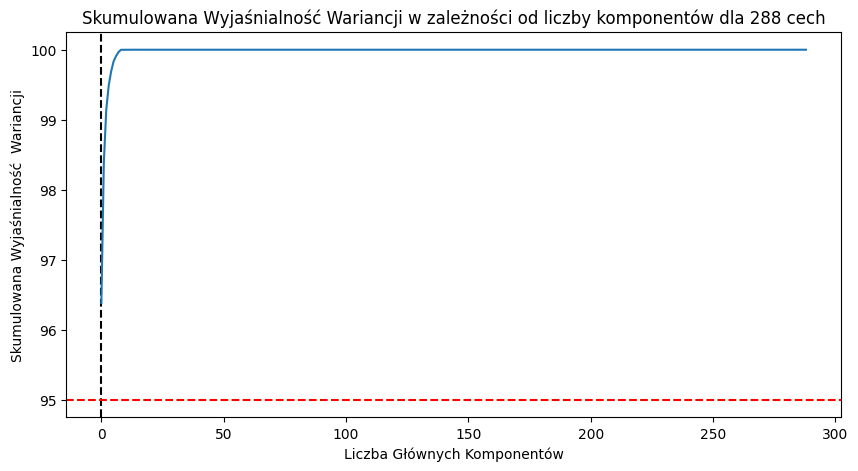

2024-01-23 22:10:28,101 - INFO - Finished loading DataSet.EURO26 with 100 files and 1 statistics


Number of components explaining 95% variance: 1


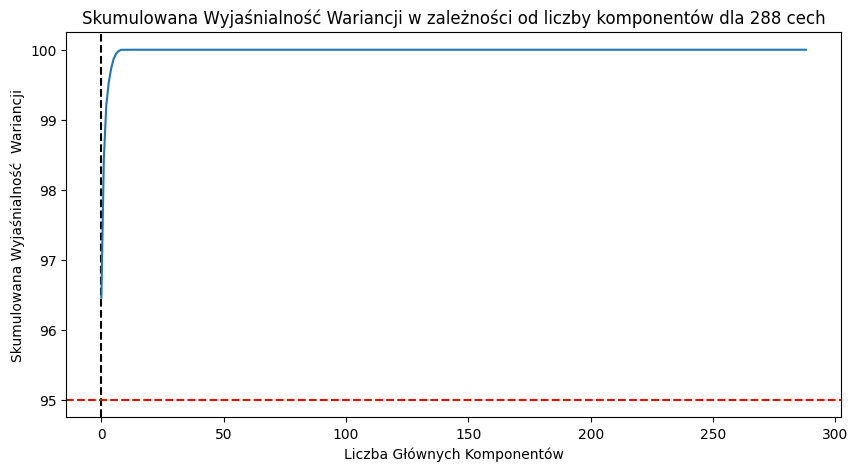

2024-01-23 22:10:43,211 - INFO - Finished loading DataSet.US26 with 100 files and 2 statistics


Number of components explaining 95% variance: 4


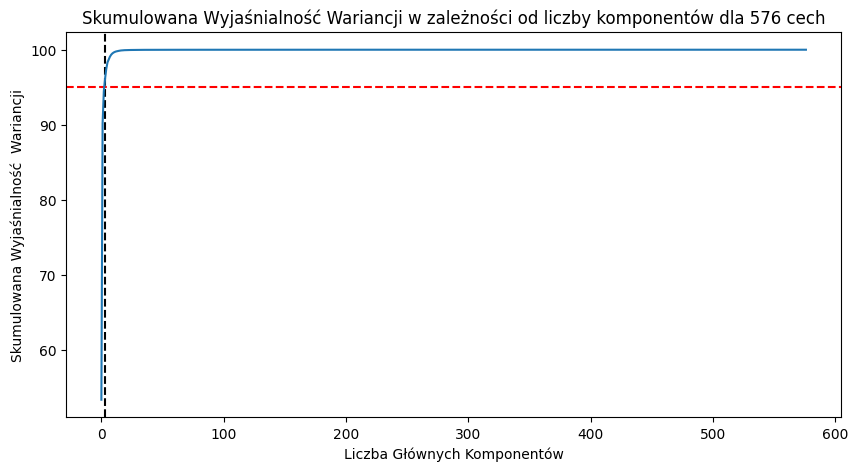

2024-01-23 22:11:00,924 - INFO - Finished loading DataSet.EURO26 with 100 files and 2 statistics


Number of components explaining 95% variance: 4


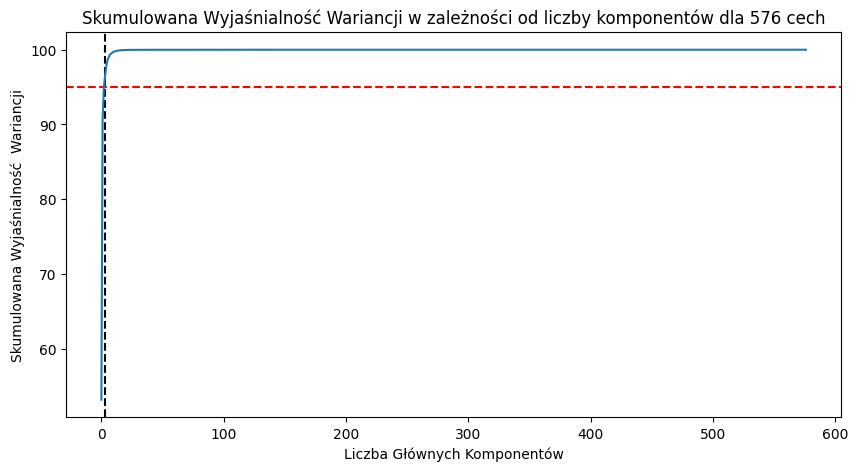

2024-01-23 22:11:23,110 - INFO - Finished loading DataSet.US26 with 100 files and 3 statistics


Number of components explaining 95% variance: 6


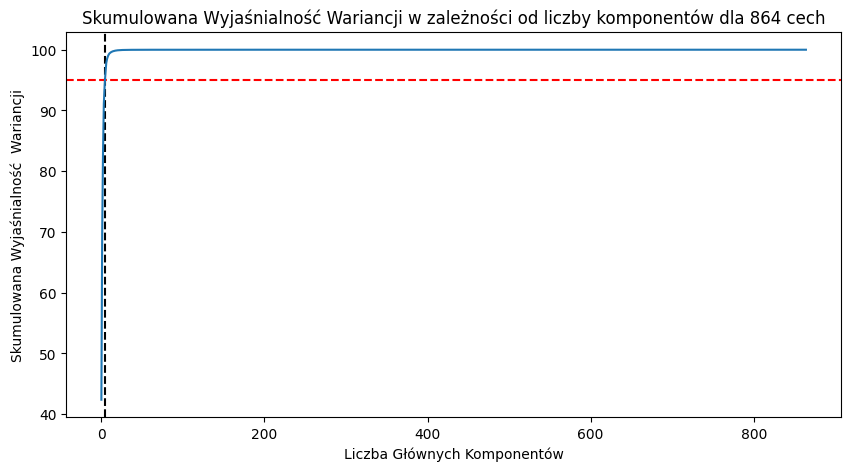

2024-01-23 22:11:46,270 - INFO - Finished loading DataSet.EURO26 with 100 files and 3 statistics


Number of components explaining 95% variance: 6


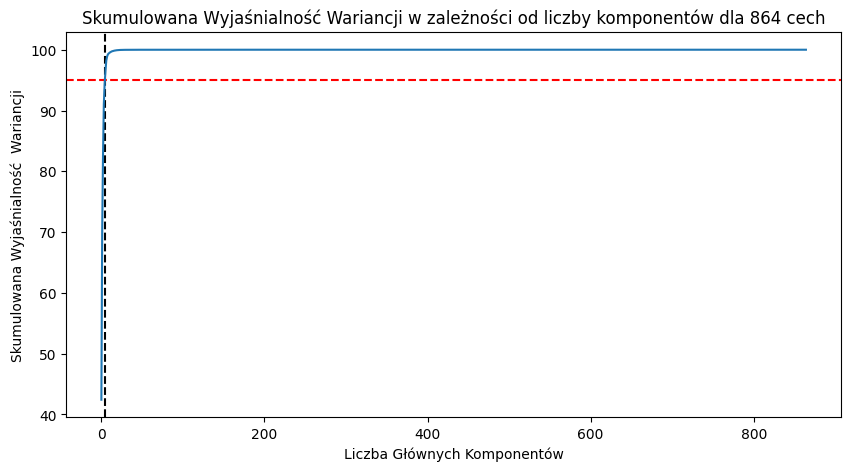

In [8]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

for statistic in [[Statistics.SUM], [Statistics.SUM, Statistics.MAX], [Statistics.SUM, Statistics.MAX, Statistics.MEAN]]:
    for dataset in [DataSet.US26, DataSet.EURO26]:
        df_X = load_and_process_X(dataset, 100, statistic)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df_X)
        pca = PCA()
        pca.fit(X_scaled)
        
        var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
        k = np.argmax(var_cumu>95)

        print("Number of components explaining 95% variance: "+ str(k + 1))
        print("\n")
        num_of_features = len(statistic) * 288
        title = f'Skumulowana Wyjaśnialność Wariancji w zależności od liczby komponentów dla {num_of_features} cech'

        plt.figure(figsize=[10,5])
        plt.title(title)
        plt.ylabel('Skumulowana Wyjaśnialność  Wariancji')
        plt.xlabel('Liczba Głównych Komponentów')
        plt.axvline(x=k, color="k", linestyle="--")
        plt.axhline(y=95, color="r", linestyle="--")
        ax = plt.plot(var_cumu)
        plt.show()

In [10]:
from create_model import evaluate_model
from sklearn.ensemble import RandomForestRegressor

num_files = 100
results_euro = evaluate_model(DataSet.EURO26, RandomForestRegressor(random_state=random_state), num_files, [Statistics.SUM, Statistics.MAX], random_state, 0.95, None)
print("Metrics for the EURO 28 topology:")
print(results_euro)

results_us = evaluate_model(DataSet.US26, RandomForestRegressor(random_state=random_state), num_files, [Statistics.SUM, Statistics.MAX], random_state, 0.95, None)
print("\nMetrics for the US 26 topology:")
print(results_us)

2024-01-23 23:08:58,842 - INFO - Finished loading DataSet.EURO26 with 1 files and 2 statistics
2024-01-23 23:08:58,845 - INFO - Finished loading DataSet.EURO26 with 1 files
2024-01-23 23:08:58,958 - INFO - Finished evaluating RandomForestRegressor on fold 0, repeat 0 and split 0 left: 9
2024-01-23 23:08:59,092 - INFO - Finished evaluating RandomForestRegressor on fold 1, repeat 0 and split 1 left: 8
2024-01-23 23:08:59,223 - INFO - Finished evaluating RandomForestRegressor on fold 2, repeat 1 and split 0 left: 7
2024-01-23 23:08:59,332 - INFO - Finished evaluating RandomForestRegressor on fold 3, repeat 1 and split 1 left: 6
2024-01-23 23:08:59,454 - INFO - Finished evaluating RandomForestRegressor on fold 4, repeat 2 and split 0 left: 5
2024-01-23 23:08:59,564 - INFO - Finished evaluating RandomForestRegressor on fold 5, repeat 2 and split 1 left: 4
2024-01-23 23:08:59,688 - INFO - Finished evaluating RandomForestRegressor on fold 6, repeat 3 and split 0 left: 3
2024-01-23 23:08:59,79

KeyError: "['Model'] not in index"

In [6]:
from create_model import evaluate_model_with_diff_features
from sklearn.ensemble import RandomForestRegressor

results_euro = evaluate_model_with_diff_features(DataSet.EURO26, RandomForestRegressor(random_state=random_state), random_state, 0.95, None)
print("Metrics for the EURO 28 topology:")
print(results_euro)

results_us = evaluate_model_with_diff_features(DataSet.US26, RandomForestRegressor(random_state=random_state), random_state, 0.95, None)
print("Metrics for the US 26 topology:")
print(results_us)

2024-01-24 00:25:51,740 - INFO - Finished loading DataSet.EURO26 with 100 files and 1 statistics
2024-01-24 00:25:52,049 - INFO - Finished loading DataSet.EURO26 with 100 files
2024-01-24 00:25:53,466 - INFO - Finished evaluating RandomForestRegressor on fold 0, repeat 0 and split 0 left: 9
2024-01-24 00:25:53,948 - INFO - Finished evaluating RandomForestRegressor on fold 1, repeat 0 and split 1 left: 8
2024-01-24 00:25:54,578 - INFO - Finished evaluating RandomForestRegressor on fold 2, repeat 1 and split 0 left: 7
2024-01-24 00:25:55,153 - INFO - Finished evaluating RandomForestRegressor on fold 3, repeat 1 and split 1 left: 6
2024-01-24 00:25:55,945 - INFO - Finished evaluating RandomForestRegressor on fold 4, repeat 2 and split 0 left: 5
2024-01-24 00:25:56,321 - INFO - Finished evaluating RandomForestRegressor on fold 5, repeat 2 and split 1 left: 4
2024-01-24 00:25:56,713 - INFO - Finished evaluating RandomForestRegressor on fold 6, repeat 3 and split 0 left: 3
2024-01-24 00:25:5

Metrics for the EURO 28 topology:
                   Model          PCA  Num Request sets  Num Features  \
0  RandomForestRegressor     with PCA               100           289   
1  RandomForestRegressor     with PCA               100           577   
2  RandomForestRegressor     with PCA               100           865   
3  RandomForestRegressor  without PCA               100           289   
4  RandomForestRegressor  without PCA               100           577   
5  RandomForestRegressor  without PCA               100           865   

   Num Samples  R^2 score    MSE score  MAE score  
0         2300   0.964458  1856.440359  17.312295  
1         2300   0.991489   444.766385  10.489208  
2         2300   0.990386   503.107213   9.851983  
3         2300   0.997776   116.216615   6.260474  
4         2300   0.997767   116.736075   6.795269  
5         2300   0.997839   112.936803   6.651599  


2024-01-24 00:43:42,234 - INFO - Finished loading DataSet.US26 with 100 files and 1 statistics
2024-01-24 00:43:42,405 - INFO - Finished loading DataSet.US26 with 100 files
2024-01-24 00:43:42,755 - INFO - Finished evaluating RandomForestRegressor on fold 0, repeat 0 and split 0 left: 9
2024-01-24 00:43:43,261 - INFO - Finished evaluating RandomForestRegressor on fold 1, repeat 0 and split 1 left: 8
2024-01-24 00:43:43,623 - INFO - Finished evaluating RandomForestRegressor on fold 2, repeat 1 and split 0 left: 7
2024-01-24 00:43:44,117 - INFO - Finished evaluating RandomForestRegressor on fold 3, repeat 1 and split 1 left: 6
2024-01-24 00:43:44,451 - INFO - Finished evaluating RandomForestRegressor on fold 4, repeat 2 and split 0 left: 5
2024-01-24 00:43:44,784 - INFO - Finished evaluating RandomForestRegressor on fold 5, repeat 2 and split 1 left: 4
2024-01-24 00:43:45,124 - INFO - Finished evaluating RandomForestRegressor on fold 6, repeat 3 and split 0 left: 3
2024-01-24 00:43:45,44

Metrics for the US 28 topology:
                   Model          PCA  Num Request sets  Num Features  \
0  RandomForestRegressor     with PCA               100           289   
1  RandomForestRegressor     with PCA               100           577   
2  RandomForestRegressor     with PCA               100           865   
3  RandomForestRegressor  without PCA               100           289   
4  RandomForestRegressor  without PCA               100           577   
5  RandomForestRegressor  without PCA               100           865   

   Num Samples  R^2 score    MSE score  MAE score  
0         2300   0.956080  2541.922990  21.826503  
1         2300   0.990184   568.607752  13.170145  
2         2300   0.989872   586.569104  12.644064  
3         2300   0.997595   139.145914   8.310543  
4         2300   0.997621   137.593195   8.281042  
5         2300   0.997653   135.770912   8.219293  


In [ ]:
from create_model import plot_metrics_by_dataset_size

plot_metrics_by_dataset_size(DataSet.EURO26, base_models, 10, [Statistics.SUM, Statistics.MIN], 42, True, 0.90,
                                 None)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

common_params = {
    "X": df_X,
    "y": df_y.values.ravel(),
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": RepeatedKFold(n_splits=2, n_repeats=5, random_state=random_state),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "r2",
}

datasets = ["Euro 28", "US 26"]

def create_and_save_learning_curve(estimator, file_name, pca_enable, model_name):
    ax = plt.gca()
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    title = f"Learning Curve for {model_name}"
    if pca_enable:
        title += " with PCA"
    ax.set_title(title)
    plt.xticks(rotation=90)

    plt.savefig(file_name, bbox_inches='tight')
    plt.show()
    # plt.close(fig)

for dataset in datasets:
    name = f"GradientBoostingRegressor {dataset}"
    file_name = f"learning_curve_{dataset}".replace(" ", "_")
    file_name_pca = f"learning_curve_PCA_{dataset}"
    estimator1 = make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=random_state))
    create_and_save_learning_curve(estimator1, file_name, pca_enable=False, model_name=name)
    
    estimator2 = make_pipeline(StandardScaler(), PCA(n_components=2), GradientBoostingRegressor(random_state=random_state))
    create_and_save_learning_curve(estimator2, file_name_pca, pca_enable=True, model_name=name)